# Задание лабораторной работы

- Выбрать набор данных (датасет) для решения задачи прогнозирования временного ряда.
- Визуализировать временной ряд и его основные характеристики.
- Разделить временной ряд на обучающую и тестовую выборку.
- Произвести прогнозирование временного ряда с использованием как минимум двух методов.
- Визуализировать тестовую выборку и каждый из прогнозов.
- Оценить качество прогноза в каждом случае с помощью метрик.

# Ячейки Jupyter-ноутбука

## Выбор и загрузка данных

### Текстовое описание

В качестве датасета для решения задачи прогнозирования временного ряда будем использовать набор данных, содержащий ежедневные климатические данные в городе Дели с 2013 по 2017 год. Данный набор доступен по адресу: https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data

Набор данных имеет следующие атрибуты:

- date - Дата - метка времени
- meantemp - Средняя температура - средняя температура, расчитанная по нескольким 3-часовым интервалам в день
- humidity - Влажность - показатель влажности в граммах воды на кубический метр воздуха
- wind_speed - Скорость ветра - скорость ветра в километрах в час
- meanpressure - Среднее давление - среднее давление в атмосферах

### Импорт библиотек

Импортируем библиотеки с помощью команды import:

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt

Уберем предупреждения:

In [9]:
import warnings
warnings.filterwarnings('ignore')

### Загрузка данных

Выборка уже разделена. Для первичного анализа объединим тестовую и обучающую выборку:

In [12]:
data_test = pd.read_csv('DailyDelhiClimateTest.csv', header=0, parse_dates=['date'], index_col='date')
data_train = pd.read_csv('DailyDelhiClimateTrain.csv', header=0, parse_dates=['date'], index_col='date')
data = pd.concat([data_train, data_test], axis=0)

## Первичная обработка данных и визуализация

### Первичный анализ

Выведем первые 5 строк датасета:

In [13]:
data.head()

,meantemp,humidity,wind_speed,meanpressure
date,,,,
2013-01-01,10.000000,84.500000,0.000000,1015.666667
2013-01-02,7.400000,92.000000,2.980000,1017.800000
2013-01-03,7.166667,87.000000,4.633333,1018.666667
2013-01-04,8.666667,71.333333,1.233333,1017.166667
2013-01-05,6.000000,86.833333,3.700000,1016.500000


Определим размер датасета:

In [14]:
data.shape

(1576, 4)

Определим типы данных:

In [15]:
data.dtypes

meantemp        float64
humidity        float64
wind_speed      float64
meanpressure    float64
dtype: object

### Обработка данных

Оставим только столбец влажности для временного ряда:

In [16]:
data = data.drop(columns=['meantemp'], axis=1)
data = data.drop(columns=['wind_speed'], axis=1)
data = data.drop(columns=['meanpressure'], axis=1)

In [17]:
data.head()

,humidity
date,
2013-01-01,84.500000
2013-01-02,92.000000
2013-01-03,87.000000
2013-01-04,71.333333
2013-01-05,86.833333


### Основные статистические характеристки

Определим основные статистические характеристки временного ряда:

In [18]:
data.describe()

,humidity
count,1576.000000
mean,60.445229
std,16.979994
min,13.428571
25%,49.750000
50%,62.440476
75%,72.125000
max,100.000000


### Визуализация исходного временного ряда

В виде графика:

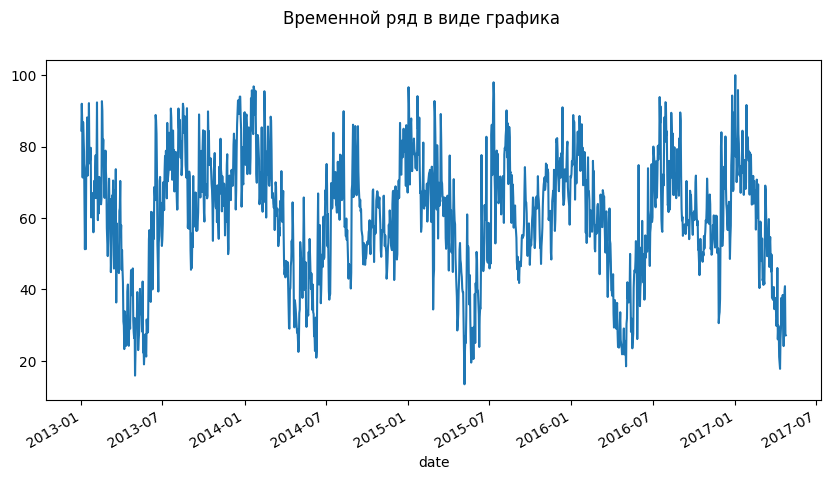

In [19]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд в виде графика')
data.plot(ax=ax, legend=False)
pyplot.show()

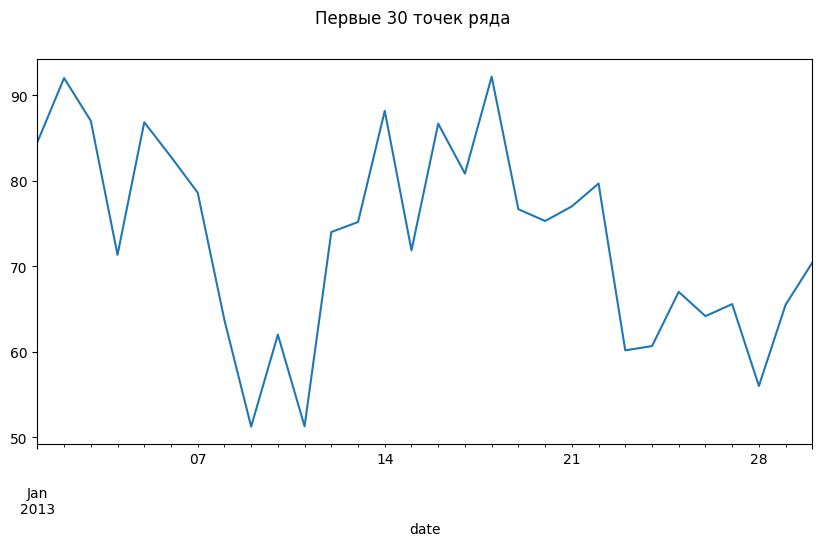

In [20]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Первые 30 точек ряда')
data[:30].plot(ax=ax, legend=False)
pyplot.show()

В виде гистограммы:

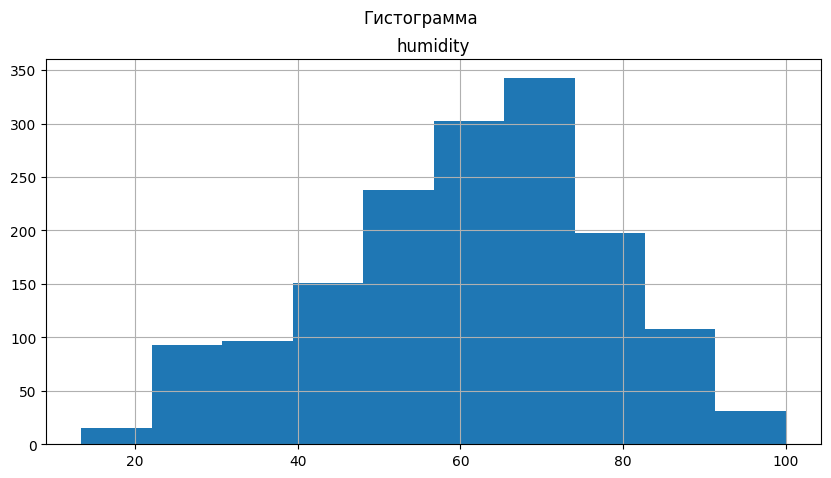

In [21]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Гистограмма')
data.hist(ax=ax, legend=False)
pyplot.show()

Вероятностная плотность распределения данных:

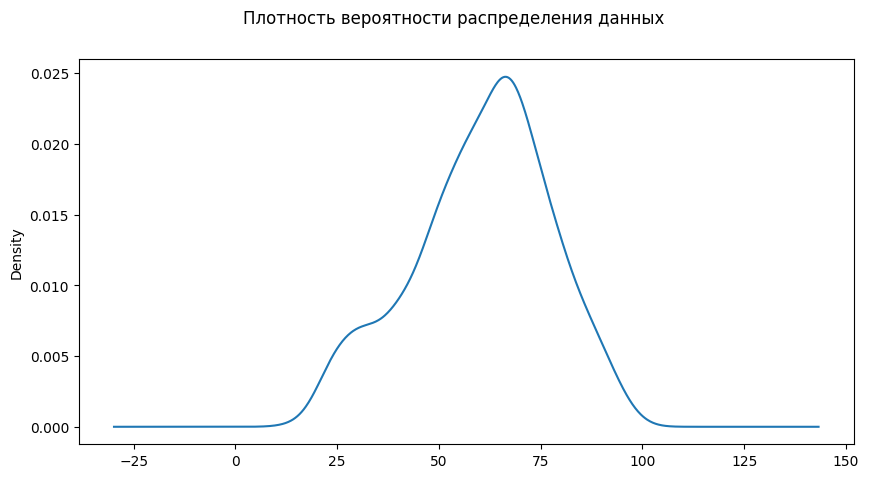

In [22]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Плотность вероятности распределения данных')
data.plot(ax=ax, kind='kde', legend=False)
pyplot.show()

С помощью Lag Plot:

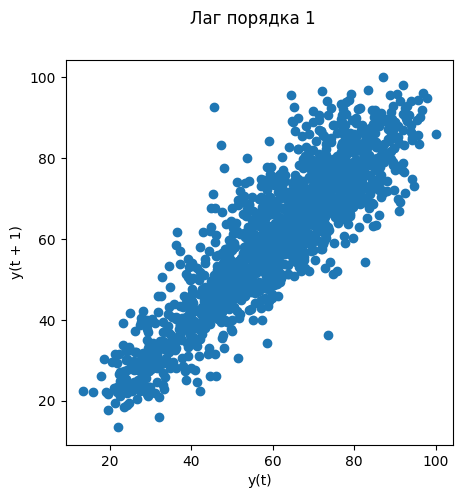

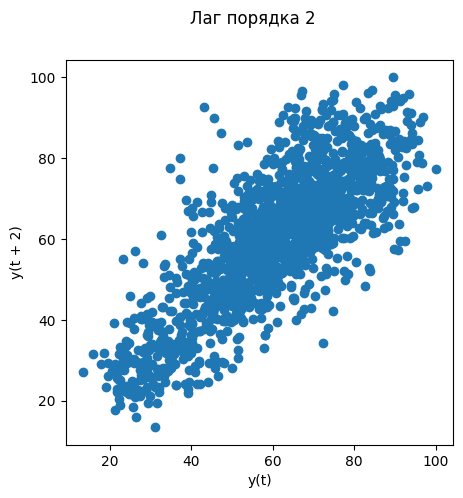

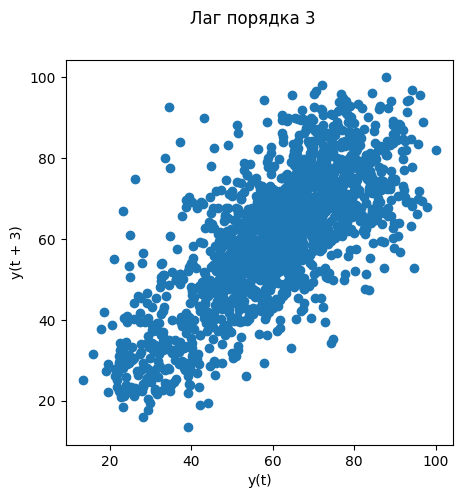

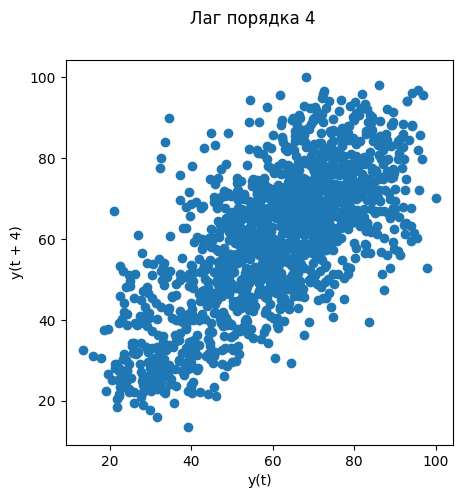

In [23]:
for i in range(1, 5):
    fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(5,5))
    fig.suptitle(f'Лаг порядка {i}')
    pd.plotting.lag_plot(data, lag=i, ax=ax)
    pyplot.show()

Наблюдается достаточно сильная положительная корреляция.

Автокорреляционная диаграмма:

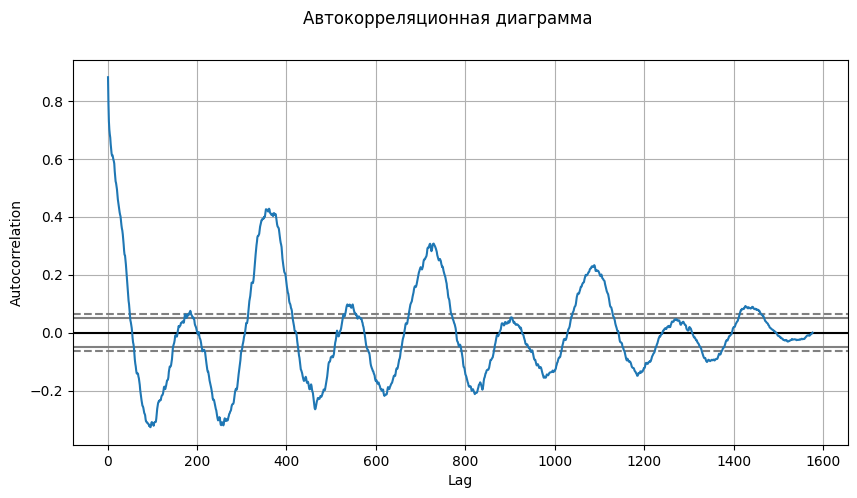

In [24]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Автокорреляционная диаграмма')
pd.plotting.autocorrelation_plot(data, ax=ax)
pyplot.show()

Автокорреляционная функция:

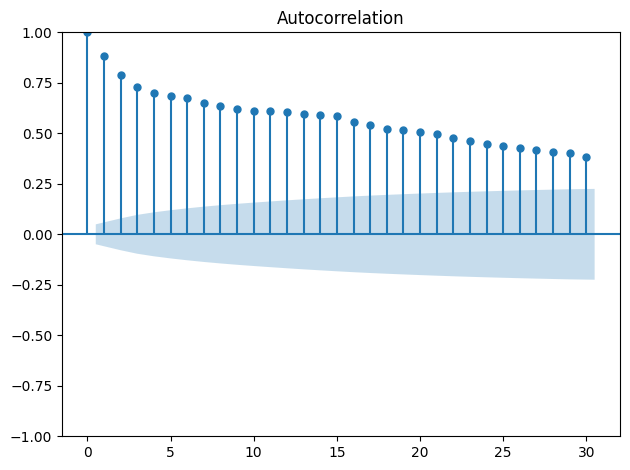

In [25]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(data, lags=30)
plt.tight_layout()

Частичная автокорреляционная функция:

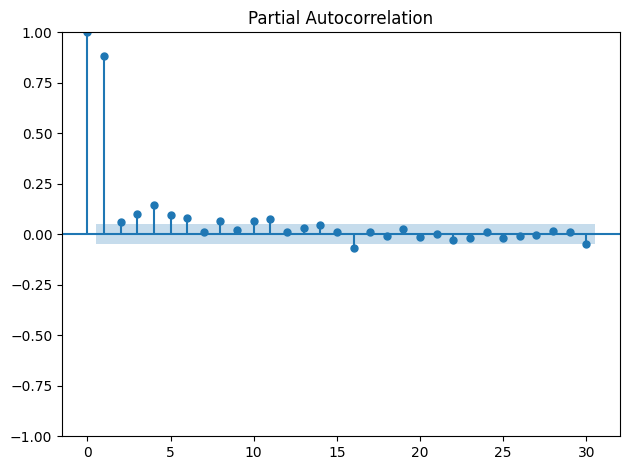

In [26]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(data, lags=30)
plt.tight_layout()

Временной ряд со скользящими средними:

In [27]:
data2 = data.copy()

In [28]:
data2['SMA_10'] = data2['humidity'].rolling(10, min_periods=1).mean()
data2['SMA_20'] = data2['humidity'].rolling(20, min_periods=1).mean()

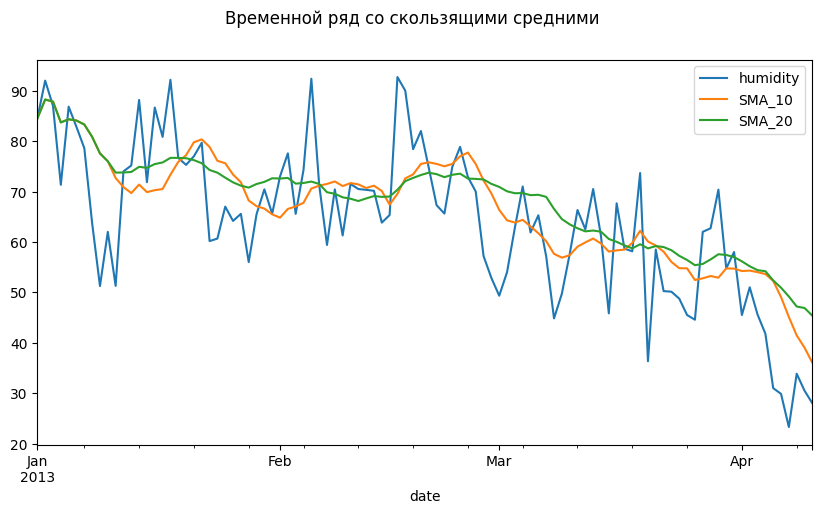

In [29]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Временной ряд со скользящими средними')
data2[:100].plot(ax=ax, legend=True)
pyplot.show()

## Прогнозирование временного ряда с использованием авторегрессионного метода

Будем использовать авторегриссионный метод ARIMA:

In [30]:
from statsmodels.tsa.arima.model import ARIMA

### Разделение выборки на обучающую и тестовую

In [31]:
xnum = list(range(data2.shape[0]))
Y = data2['humidity'].values
train_size = int(len(Y) * 0.7)
xnum_train, xnum_test = xnum[0:train_size], xnum[train_size:]
train, test = Y[0:train_size], Y[train_size:]
history_arima = [x for x in train]

### Прогноз ARIMA

In [35]:
arima_order = (6, 1, 0)
predictions_arima = list()
for t in range(len(test)):
    model_arima = ARIMA(history_arima, order=arima_order)
    model_arima_fit = model_arima.fit()
    yhat_arima = model_arima_fit.forecast()[0]
    predictions_arima.append(yhat_arima)
    history_arima.append(test[t])

In [33]:
data2['predictions_ARIMA'] = (train_size * [np.NAN]) + list(predictions_arima)

### Визуализация

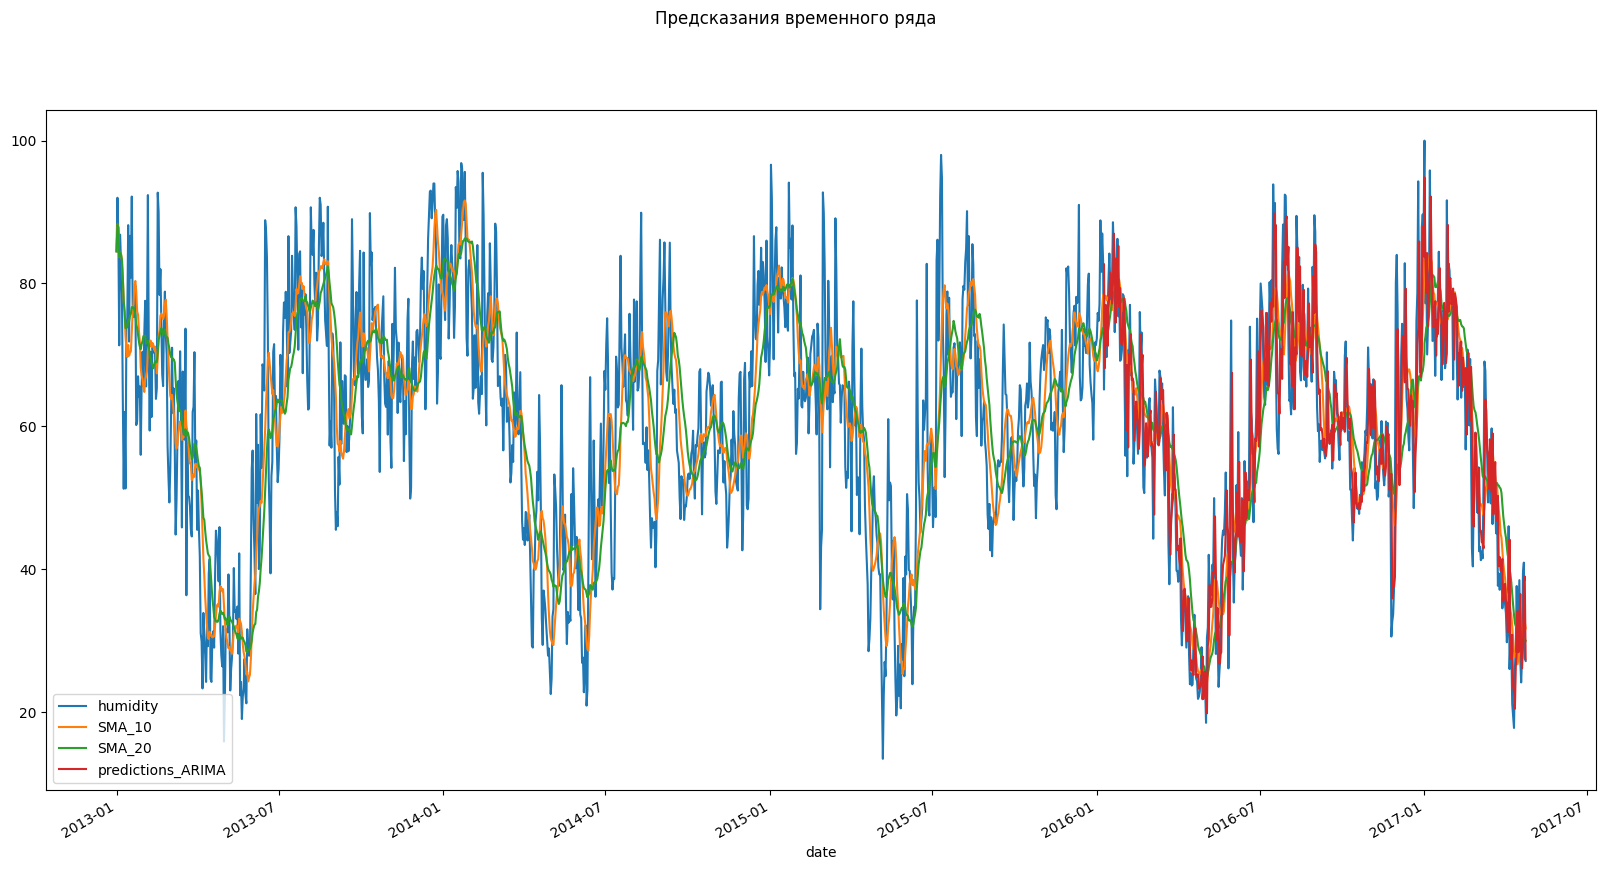

In [34]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
fig.suptitle('Предсказания временного ряда')
data2.plot(ax=ax, legend=True)
pyplot.show()

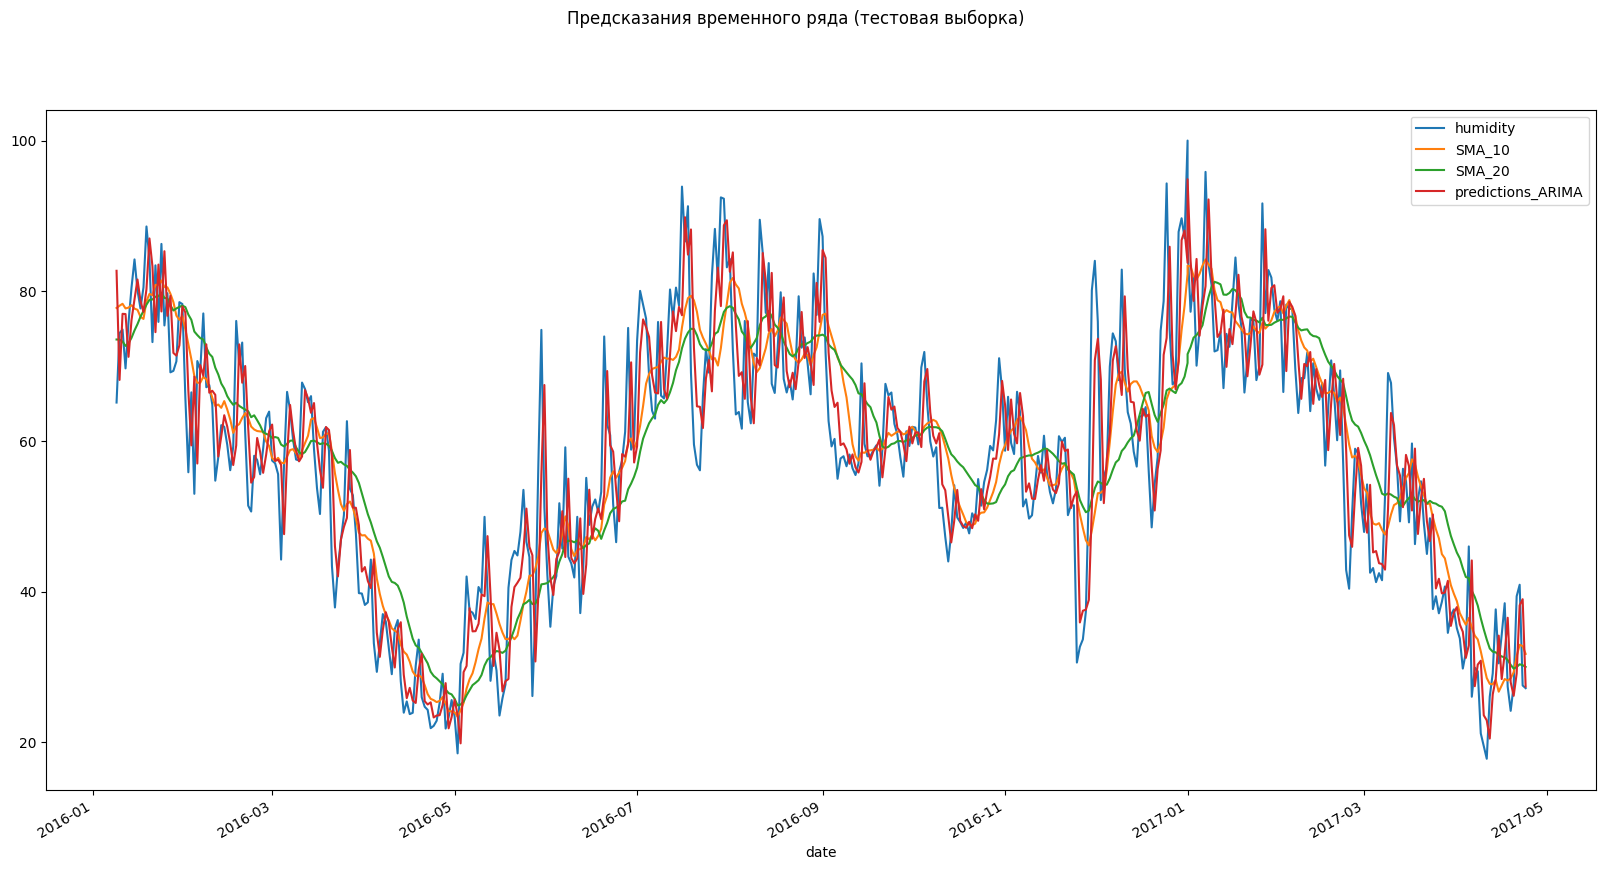

In [36]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
data2[train_size:].plot(ax=ax, legend=True)
pyplot.show()

Предсказания ARIMA точны, близки к исходному, далеки от среднего скользящего.

### Метрики

MAE и MSE:

In [37]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [38]:
mean_squared_error(test, predictions_arima, squared=False)

7.491497821228328

In [39]:
mean_absolute_error(test, predictions_arima)

5.595463345661848

## Прогнозирование временного ряда с использованием метода символьной регрессии

Будем использовать библиотеку gplearn:

In [40]:
from gplearn.genetic import SymbolicRegressor

### Прогноз

In [41]:
function_set = ['add', 'sub', 'mul', 'div', 'sin']
est_gp = SymbolicRegressor(population_size=500, metric='mse',
                               generations=200, stopping_criteria=0.01,
                               init_depth=(4, 10), verbose=1, function_set=function_set,
                               const_range=(-10, 10), random_state=0)

In [42]:
est_gp.fit(np.array(xnum_train).reshape(-1, 1), train.reshape(-1, 1))

    |   Population Average    |             Best Individual              |
---- ------------------------- ------------------------------------------ ----------
 Gen   Length          Fitness   Length          Fitness      OOB Fitness  Time Left
   0   263.65      1.91324e+67       26           3366.8              N/A      5.85m
   1   161.42      1.73488e+15        3           771.22              N/A      2.54m
   2    62.67      3.99717e+14        3           771.22              N/A      1.53m
   3    39.15      3.51722e+10        3            285.6              N/A      1.56m
   4    24.00      3.38638e+11        3            285.6              N/A     56.82s
   5    26.05      6.84991e+09       34           280.86              N/A     59.61s
   6    11.13       1.4874e+10       35          280.438              N/A     47.45s
   7    19.15      4.04141e+06       33          280.136              N/A      1.04m
   8    33.94      2.44637e+10       62          279.776              N/A  

  94  1065.47           128891      974          120.402              N/A      9.21m
  95  1066.71           251783     1023           120.04              N/A      7.27m
  96  1003.03           202755     1037          119.958              N/A      6.34m
  97   981.58           159988     1001          119.906              N/A      6.40m
  98   993.94           322564      989          119.464              N/A      6.41m
  99   991.74           187031      946          119.374              N/A      7.64m
 100   993.97           105857     1142          119.102              N/A      8.21m
 101   976.85          79860.2     1144          119.079              N/A      7.44m
 102   995.50           221920      951          118.929              N/A      6.94m
 103   938.70          90457.6      950          118.854              N/A      6.49m
 104   937.47           314656      939           118.68              N/A      6.86m
 105   936.34           149304      919          118.526         

 191  2018.53           173633     2083          102.054              N/A     57.01s
 192  2020.19           116259     2085          102.036              N/A     51.89s
 193  2036.41           134852     2081          101.931              N/A     43.04s
 194  2064.99          63033.3     2077          101.905              N/A     36.30s
 195  2083.19          33114.6     2082          101.271              N/A     29.98s
 196  2076.44           242556     2082          101.259              N/A     21.29s
 197  2075.79           192377     2082          101.247              N/A     16.55s
 198  2089.56      5.95726e+08     2101          101.067              N/A      7.75s
 199  2086.89          58925.5     2051          101.046              N/A      0.00s


SymbolicRegressor(const_range=(-10, 10),
                  function_set=['add', 'sub', 'mul', 'div', 'sin'],
                  generations=200, init_depth=(4, 10), metric='mse',
                  population_size=500, random_state=0, stopping_criteria=0.01,
                  verbose=1)

In [43]:
y_gp = est_gp.predict(np.array(xnum_test).reshape(-1, 1))
y_gp[:10]

array([73.80469798, 74.62276246, 74.81765215, 74.88961676, 74.91224874,
       74.90617581, 74.87934757, 74.83554142, 74.77687615, 74.70473071])

In [44]:
data2['predictions_GPLEARN'] = (train_size * [np.NAN]) + list(y_gp)

### Визуализация

Построим дерево по символьной регрессии:

In [47]:
import graphviz
import pydotplus
from sklearn.tree import export_graphviz

In [50]:
dot_data = est_gp._program.export_graphviz()
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size(10)
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

ExecutableNotFound: failed to execute WindowsPath('dot'), make sure the Graphviz executables are on your systems' PATH

Построим график по тестовой выборке:

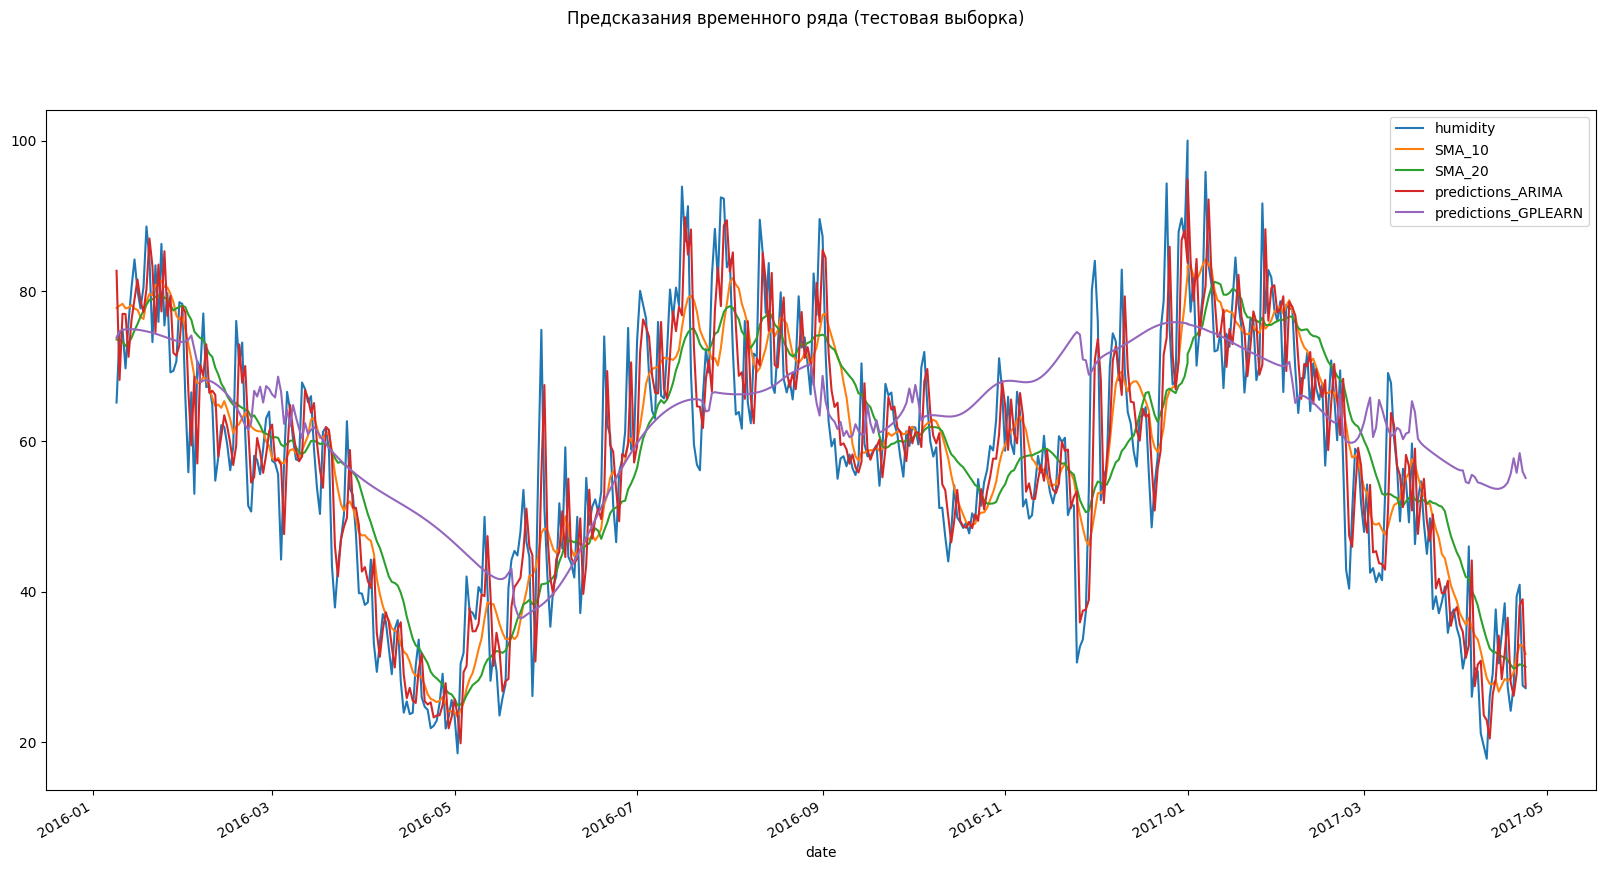

In [51]:
fig, ax = pyplot.subplots(1, 1, sharex='col', sharey='row', figsize=(20,10))
fig.suptitle('Предсказания временного ряда (тестовая выборка)')
data2[train_size:].plot(ax=ax, legend=True)
pyplot.show()

Визуально предсказания по методу сивольной регрессии менее точны, чем предсказания по ARIMA. Для повышения точности требуется настройка параметров метода, в частности увеличенное количество итераций цикла. Однако при этом сильно возрастут затраты времени.

### Метрики

MAE и MSE:

In [52]:
mean_squared_error(test, y_gp, squared=False)

13.52324614284193

In [53]:
mean_absolute_error(test, y_gp)

10.607119049073066

## Сранение качества моделей

Чем ближе значение MAE и MSE к нулю, тем лучше качество модели.

MAE для авторегрессионного метода ARIMA = 5.5, а для метода символьной регрессии = 10.6.

MSE для авторегрессионного метода ARIMA = 7.3, а для метода символьной регрессии = 13.5.

Качество модели для авторегрессионного метода ARIMA выше. Для выполенения ARIMA также требуется меньше времени. 